In [1]:
# required for the animated 3D figures
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
import math


# Sensitivität lt. NBCI Studie PMC7445394 zwischen 70 und 95%
# RKI über 99%
sensitivity = 0.99

# Spezifität gleiche Studie fast 100%
specificity = 0.999

# RKI Statusbericht Oktober 2020
# KW 34 bis KW 40 circa 1mi Test pro Tag
# KW 40 1.1 mio
absolute_tests_measured = 1_100_000
# Davon positiv zwischen 9 und 18 tausend
absolute_positive_measured = 18_000

# Daraus folgt die Wahrscheinlichkeit für einen positiven test
p_test_pos_measured = absolute_positive_measured/absolute_tests_measured
p_test_neg_measured=1-p_test_pos_measured

# Von den getesteten sind 0.0163636 positiv. Es ist eher anzunehemn, dass der Anteil der tatsächlich
# positiven geringer ist, da sich besonders Menschen mit Sysptomen oder Risikoexpositionen testen lassen,
# aber trotzdem nehemn wir mal eine ganz üble Durchseuchung an:
p_cov_pos = 0.1;
p_cov_neg = 1-p_cov_pos

# Damit jetzt der Staz von Bayes überhaupt funktioniert, müssen wir natürlich die 4-Feldertafel
# Mit den angenommenen Werten auffüllen:
p_test_pos=sensitivity*p_cov_pos + p_cov_neg-p_cov_neg*specificity
p_test_neg=1-p_test_pos

# Dann kommt der Satz von Bayes in Spiel, der uns dabei hilft folgende Frage zu beantworten:
# Wieviele von den positiv getesteten sind auch tatsächlich positiv?
p_cov_pos_under_test_pos = (p_cov_pos * sensitivity) / p_test_pos
# bzw. Wieviele sind auch tatsächlich negativ wenn der test negaiv war?
p_cov_neg_under_test_neg = (p_cov_neg * specificity) / p_test_neg

print('Anteil der positiven bei positivem Test:'+str(p_cov_pos_under_test_pos))
print('Anteil der negativen bei negativem Test:'+str(p_cov_neg_under_test_neg))

Anteil der positiven bei positivem Test:0.9909909909909912
Anteil der negativen bei negativem Test:0.9988890123319631


<IPython.core.display.Javascript object>


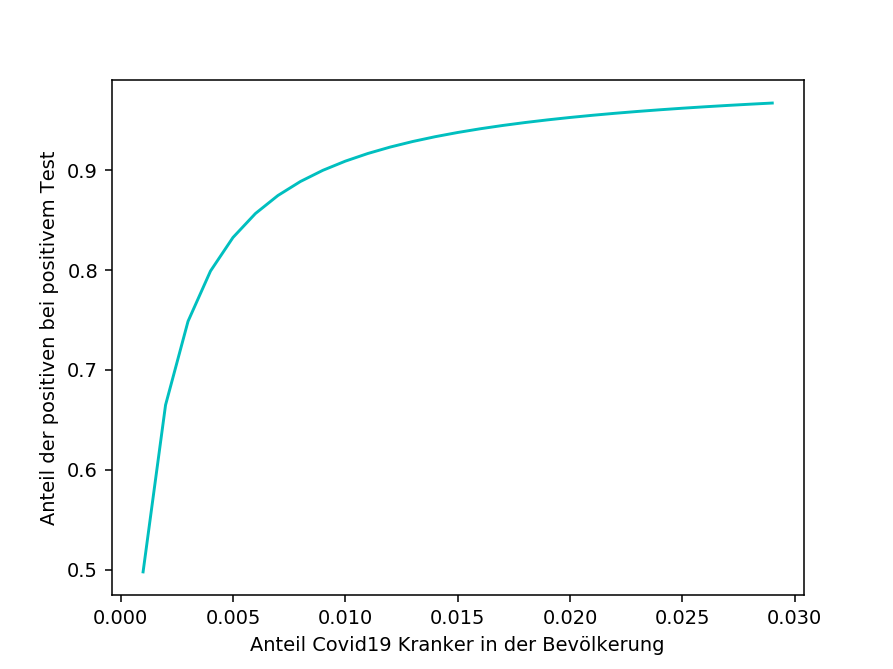

<function matplotlib.pyplot.show(*args, **kw)>

In [2]:
# So, jetzt variieren wir mal die Durchseuchung
# Zuerst die Funktion, die wir anzeigen wollen
def pospos_ (x):
    return (x * sensitivity) / (sensitivity * x + (1-x)-((1-x)*specificity))
pospos = np.vectorize(pospos_)

# Define a range: start, end, step
r= np.arange(0.001, 0.03, 0.001)

# Calcuate te points
y=pospos(r)

# Define a figute
fig = plt.figure()

#Plot the figure: x, f(x), 
plt.plot(r,y,'c')
plt.ylabel("Anteil der positiven bei positivem Test")
plt.xlabel("Anteil Covid19 Kranker in der Bevölkerung")
plt.show

<IPython.core.display.Javascript object>


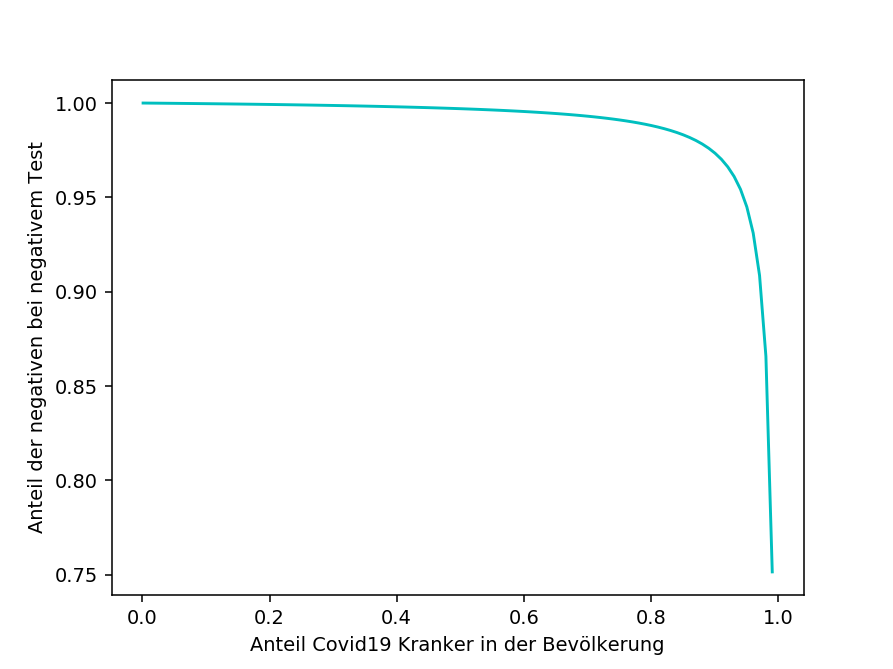

<function matplotlib.pyplot.show(*args, **kw)>

In [7]:
# das gleiche für die falsch negativen
def negneg_ (x):
    return (((1-x) * specificity) / (1-(sensitivity*x + (1-x)-(1-x)*specificity)))
negneg = np.vectorize(negneg_)

# Define a range: start, end, step
r= np.arange(0.001, 1, 0.01)

# Calcuate te points
y=negneg(r)

# Define a figute
fig = plt.figure()

#Plot the figure: x, f(x), 
plt.plot(r,y,'c',label="Anteil der negativen bei negativem Test")
plt.ylabel("Anteil der negativen bei negativem Test")
plt.xlabel("Anteil Covid19 Kranker in der Bevölkerung")
plt.show